In [1]:
# Import necessary packages here, e.g.
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting

# Add other packages as needed, for example:
# import pandas as pd            # for data manipulation

# NASA Sea Surface Salinity in July 2022  
*(Replace "Descriptive Project Title" above with the actual title of your project)*

**Ava Afonso**  
*(Replace "Your Name" with your full name)*  

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

*(Write 1–2 paragraphs below)*  

Your introduction here.

hypothesis on change in sea surface salinity spanned upon a week in July 2022: there's not going to be much change other than some circulation and movement of salinity in the ocean due to surface currents/gyers in the Atlantic Ocean and the Thermohalnine Circulation from the entire globe's ocean. For my data **only** consisting of a week's range, there won't be much change due to the constant inflows and outflows of water moving into and out of the ocean-- its circulation of salinity won't have a lot of change to it.


## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- {Dataset 1}
  - Downloaded from {data source} *e.g., National Data Buoy Center* on {date} *e.g., 2024-10-30*.
  - Data collection process: *e.g. Data collected by inductive T sensor deployed on stationary mooring at 20 m depth.*
  - Relevant variables included: 
    - {Variable 1 including units} *e.g. Water Temperature at 20m depth (&deg;C)*
  - Spatial coverage and resolution: {coverage}, {resolution} *e.g., global, 1-degree grid*
  - Obstacles to data access: *e.g. Data for each mooring had to be accessed individually so I had to acquire 10 data files and merge them together using pandas.*
  - Temporal coverage and resolution: {coverage}, {resolution} *e.g., monthly, 1980-2020*
  - URL to dataset: {insert URL} 
<br>
- {Dataset 2}
  - etc.

## 1. {Analyzing Sea Surface Salinity}  
*(Replace "Section 1 Title" with something meaningful, e.g., "Analyzing Seasonal Temperature Trends")* 

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

Short introduction to this: I took data from NASA that's from satellite images that captured data on sea surface salinity from a week in July in 2022.

In [2]:
# load data file(s)

import xarray as xr
data = xr.open_dataset('OISSS_L4_multimission_global_7d_v1.0_2022-07-25.nc')
display(data)



# as part of commenting your code throughout this section, discuss any problems you encountered and how you solved them

<xarray.Dataset>
Dimensions:                    (longitude: 1440, latitude: 720, time: 1)
Coordinates:
  * longitude                  (longitude) float32 -179.9 -179.6 ... 179.6 179.9
  * latitude                   (latitude) float32 -89.88 -89.62 ... 89.62 89.88
  * time                       (time) datetime64[ns] 2022-07-25
Data variables:
    sss                        (latitude, longitude, time) float32 ...
    sss_empirical_uncertainty  (latitude, longitude, time) float32 ...
Attributes: (12/42)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_7d_v1
    Version:                       V1.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lat_resolution:     0.25
    geospatial_lat_units:          degrees_north
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            180.0
    geospatial_lon_resolution:     0.25
    geospatial_lon_units:          degrees_east

In [3]:
# perform data cleaning steps

In [4]:
# perform data analysis
import pandas as pd
import xarray as xr


filepath = "OISSS_L4_multimission_global_7d_v1.0_2022-07-25.nc"
global_salinity = xr.open_dataset(filepath)
display(global_salinity)

#xr.Dataset(data)
#df_rows = pd.DataFrame(data).set_index(["time",  "lat", "lon"])  # since this is a gridded data, it is useful to transorm from a table into an array 
#ds = xr.Dataset.from_dataframe(df_rows)

<xarray.Dataset>
Dimensions:                    (longitude: 1440, latitude: 720, time: 1)
Coordinates:
  * longitude                  (longitude) float32 -179.9 -179.6 ... 179.6 179.9
  * latitude                   (latitude) float32 -89.88 -89.62 ... 89.62 89.88
  * time                       (time) datetime64[ns] 2022-07-25
Data variables:
    sss                        (latitude, longitude, time) float32 ...
    sss_empirical_uncertainty  (latitude, longitude, time) float32 ...
Attributes: (12/42)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_7d_v1
    Version:                       V1.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lat_resolution:     0.25
    geospatial_lat_units:          degrees_north
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            180.0
    geospatial_lon_resolution:     0.25
    geospatial_lon_units:          degrees_east

TypeError: Dimensions of C (1, 0) should be one smaller than X(720) and Y(1440) while using shading='flat' see help(pcolormesh)

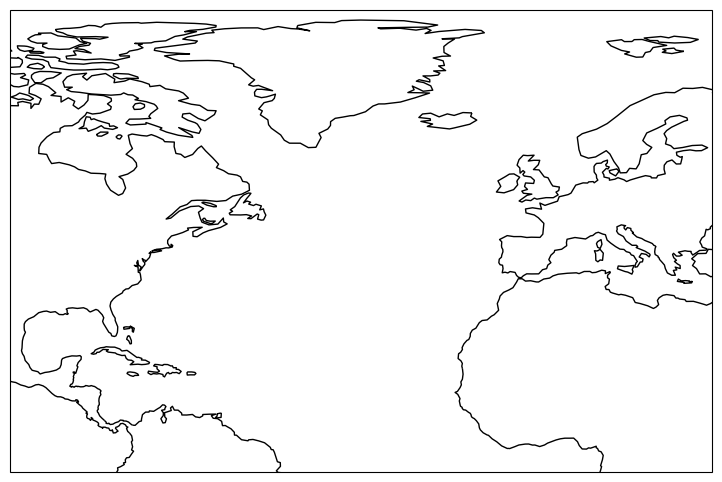

In [7]:
# make and display the first figure

#the starting slainity values started on July 21st, 2022
#the ending salinity values ended on July 29th, 2022
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import xarray as xr
from scipy import stats
import netCDF4
import cartopy.feature as cfeature


#display(s_start)
#display(s_end)
salinity_start = global_salinity['sss'].sel(time= '07-21-2022', method='nearest').squeeze()
salinity_end = global_salinity['sss'].sel(time= '07-29-2022', method='nearest').squeeze()



#global_salinity['time'] = pd.to_datetime(global_salinity['time'])
latitude =salinity_start['latitude'].values
longitude = salinity_start['longitude'].values

#global_salinity['latitude'] = np.where(global_salinity['latitude'].values == -20 & (global_salinity['longitude'].values in range (-60,-20)))
salinity_start = np.where((latitude==20))
#salinity_start = np.where((global_salinity['longitude'].values in range (-60,-20)))
#display(lat)
#display(lon)

#central_lat= global_salinity['latitude'].median()
#central_lon= global_salinity['longitude'].median()

#print(central_lat)
#print(central_lon)



fig = plt.figure(figsize = (10,6))
                 
#add cartopy features
                 
ax = plt.axes(projection= ccrs.PlateCarree(central_longitude = 0))
ax.set_extent([-100, 30, 0, 80])
ax.coastlines(color='black')


#plot sea ice concentration
plt.pcolormesh(latitude, longitude, salinity_start,
               transform=ccrs.PlateCarree(),
              cmap = cmocean.cm.tempo)
              #shading == 'nearest')

plt.colorbar(label="Sea Surface Salinity")
plt.title('Sea Surface Salinity (July 21st) at EQ')



<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** Your caption here.

## 2. {Section 2 Title}  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Short introduction to this section here.

In [ ]:
# if a new dataset, load data and perform data cleaning steps
# otherwise, continue to data analysis and figure creation

In [ ]:
# perform data analysis

In [ ]:
# make and display figure

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** Your caption here.

## 3. {Section 3 Title}  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Short introduction to this section here.

In [ ]:
# if a new dataset, load data and perform data cleaning steps
# otherwise, continue to data analysis and figure creation

In [ ]:
# perform data analysis

In [ ]:
# make and display figure

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** Your caption here.

## Discussion
**Interpretation of Results:**  *(Write ~1 paragraph below)*
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->

**Limitations and Future Work:**  *(Write ~1 paragraph below)*
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->

## References  

*Cite all papers, websites, or other resources you referenced in your project. Use a consistent citation style (e.g., APA, MLA, Chicago).*

1. **Author(s).** (Year). *Title of the work*. Publisher. URL (if applicable)  

3. **Website Name.** (Date accessed). *Title of the webpage*. URL  

*Continue listing additional references as needed.*